In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_log_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from tabulate import tabulate
from keras.models import Sequential

import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [39]:
df=pd.read_csv('KepRiau 2015 - 2022.csv')
df

,datetime,total_visitor,total_accomodation
0,1/1/2014,164430,10055
1,2/1/2014,137055,10079
2,3/1/2014,167030,10132
3,4/1/2014,151982,10190
4,5/1/2014,154299,10274
...,...,...,...
103,8/1/2022,79470,15449
104,9/1/2022,104652,15502
105,10/1/2022,106160,15525
106,11/1/2022,103940,15612


In [40]:
train_datetime=pd.to_datetime(df['datetime'])
train_datetime

0     2014-01-01
1     2014-02-01
2     2014-03-01
3     2014-04-01
4     2014-05-01
         ...    
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, Length: 108, dtype: datetime64[ns]

In [41]:
selected_columns = ['total_visitor','total_accomodation']
data_train = df.loc[:, selected_columns].astype(float)

In [42]:
scaled_data_train=StandardScaler().fit_transform(data_train)

In [43]:
n_future=1
n_step=12

X_train=[]
y_train=[]
for i in range (n_step, len(scaled_data_train)-n_future+1):
    past_data = scaled_data_train[i-n_step:i, 0:scaled_data_train.shape[1]]
    future_data=scaled_data_train[i+n_future - 1:i +n_future,0]
    
    X_train.append(past_data)
    y_train.append(future_data)

X_train=np.array(X_train)
y_train=np.array(y_train)

In [44]:
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(76, 12, 2)
(76, 1)
(20, 12, 2)
(20, 1)


In [46]:
model=Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(y_train.shape[1]))

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 64)                4288      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
history=model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
3/3 [==============================] - 2s 10ms/step - loss: 0.3162
Epoch 2/100
3/3 [==============================] - 0s 10ms/step - loss: 0.2099
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1735
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1611
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1489
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1350
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.1358
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1291
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 0.1243
Epoch 10/100
3/3 [==============================] - 0s 8ms/step - loss: 0.1184
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1131
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1132
Epoch 13/100
3/3 [==============================] - 0s 4ms/

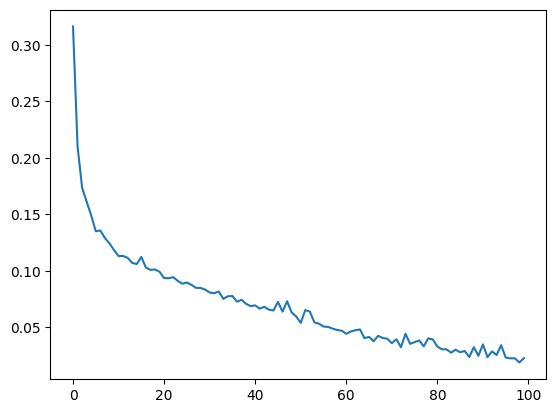

In [50]:
plt.plot(history.history['loss'])

In [51]:
n_past=1
n_pred=12
last_date=list(train_datetime)[-n_past]

predict_12=pd.date_range(last_date, periods=n_pred, freq='M').tolist()
print(predict_12)

[Timestamp('2022-12-31 00:00:00'), Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00')]


In [52]:
from sklearn.metrics import mean_absolute_error

prediction=model.predict(X_test[-n_pred:])

mse=mean_squared_error(y_test[-n_pred:],prediction)
rmse=np.sqrt(mse)
mape=mean_absolute_percentage_error(y_test[-n_pred:],prediction)
mae=mean_absolute_error(y_test[-n_pred:], prediction)

print("mse:",mse)
print("rmse",rmse)
print("mape",mape)
print("mae",mae)

1/1 [==============================] - 0s 302ms/step
mse: 0.08654951926478825
rmse 0.294192996627704
mape 2.6444934231568133
mae 0.27586660256879536


In [53]:
prediction_copy=np.repeat(prediction, data_train.shape[1],axis=-1)
y_pred_future=StandardScaler.inverse_transform(prediction_copy)[:,0]

TypeError: inverse_transform() missing 1 required positional argument: 'X'

In [ ]:
forecast_dates=[]
for i in predict_12:
    forecast_dates.append(i.date())
    
df_forecast=pd.DataFrame({'Date': forecast_dates,'total_visitor':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

actual=df[['datetime','total_visitor']]
actual['datetime']=pd.to_datetime(actual['datetime'])
actual=actual.loc[actual['datetime']>='2013-01-01']

sns.lineplot(actual, x='datetime', y='total_visitor',label='actual')
sns.lineplot(df_forecast,x='Date',y='total_visitor',label='forecast')

plt.xlabel('Year')
plt.ylabel('Total Visitor')
plt.legend()
plt.show()


In [ ]:
forecast_dates_1=pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

data=list(zip(forecast_dates_1,y_pred_future))

headers=['Date','Prediction']
table=tabulate(data, headers=headers, tablefmt='fancy_grid')
print(table)